<a href="https://colab.research.google.com/github/omiid-n99/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from google.colab import drive

In [6]:
# Load dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/test/traintrain.csv')
# df = pd.read_csv('traintrain.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [8]:
# Select columns of interest
tweet_df = df[['text', 'sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(31014, 2)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [9]:
# Remove neutral sentiment rows
tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(18467, 2)


,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive


In [10]:
tweet_df["sentiment"].value_counts()

positive    9685
negative    8782
Name: sentiment, dtype: int64

In [4]:
# Convert sentiment labels to numerical values
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 1]),
 Index(['negative', 'positive'], dtype='object'))

In [11]:
# Tokenize text data
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet.astype('str'))
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet.astype('str'))
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [12]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 's': 10, 'for': 11, 'in': 12, 'that': 13, 'of': 14, 't': 15, 'so': 16, 'me': 17, 'have': 18, 'on': 19, 'day': 20, 'm': 21, 'just': 22, 'good': 23, 'but': 24, 'with': 25, 'be': 26, 'was': 27, 'not': 28, 'all': 29, 'at': 30, 'this': 31, 'love': 32, 'can': 33, 'now': 34, 'happy': 35, 'like': 36, 'out': 37, 'up': 38, 'are': 39, 'get': 40, 'no': 41, 'too': 42, 'your': 43, 'go': 44, 'today': 45, 'work': 46, 'really': 47, 'do': 48, 'got': 49, 'http': 50, 'going': 51, 'we': 52, 'thanks': 53, 'im': 54, 'u': 55, 'one': 56, 'had': 57, 'from': 58, 'what': 59, 'am': 60, 'its': 61, 'time': 62, 'about': 63, 'there': 64, 'lol': 65, 'know': 66, 'don': 67, 'will': 68, 'great': 69, 'back': 70, 'much': 71, 'night': 72, 'miss': 73, 'com': 74, 'they': 75, 'see': 76, 'hope': 77, 'oh': 78, 'well': 79, 'new': 80, 'some': 81, 'when': 82, 'as': 83, 'think': 84, 'fun': 85, 'if': 86, 'still': 87, 'sad': 88, 'how': 89, '2': 90, 'he':

In [13]:
print(tweet[0])
print(encoded_docs[0])

 Sooo SAD I will miss you here in San Diego!!!
[358, 88, 1, 68, 73, 7, 97, 12, 1374, 2169]


In [14]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  358   88    1   68   73    7
   97 

In [15]:
# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(padded_sequence, sentiment_label[0], test_size=0.2, random_state=42)

In [16]:
# Define the model architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [19]:
# Fit the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=64, callbacks=[earlystop])

Epoch 1/10
231/231 [==============================] - 194s 822ms/step - loss: 0.5207 - accuracy: 0.7298 - val_loss: 0.3862 - val_accuracy: 0.8392
Epoch 2/10
231/231 [==============================] - 190s 818ms/step - loss: 0.3189 - accuracy: 0.8679 - val_loss: 0.3103 - val_accuracy: 0.8706
Epoch 3/10
231/231 [==============================] - 173s 746ms/step - loss: 0.2517 - accuracy: 0.9019 - val_loss: 0.3008 - val_accuracy: 0.8776
Epoch 4/10
231/231 [==============================] - 193s 835ms/step - loss: 0.2198 - accuracy: 0.9160 - val_loss: 0.3069 - val_accuracy: 0.8801
Epoch 5/10
231/231 [==============================] - 188s 810ms/step - loss: 0.2085 - accuracy: 0.9205 - val_loss: 0.3062 - val_accuracy: 0.8844
Epoch 6/10
231/231 [==============================] - 176s 764ms/step - loss: 0.1871 - accuracy: 0.9320 - val_loss: 0.3179 - val_accuracy: 0.8798


In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 87.98%


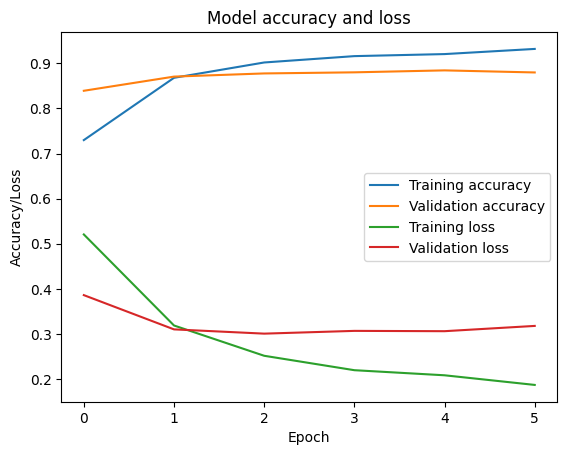

In [21]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [24]:
# Define function to predict sentiment of input text
def predict_sentiment(model, tokenizer, input_text):
    # Tokenize and pad the input text
    encoded_text = tokenizer.texts_to_sequences([input_text])
    padded_text = pad_sequences(encoded_text, maxlen=200)
    
    # Predict the sentiment using the trained model
    sentiment_prediction = model.predict(padded_text)
    
    # Return the predicted sentiment label
    if sentiment_prediction > 0.5:
        return 'positive'
    else:
        return 'negative'

# Take input text from user
while True:
    if input_text == "":
        break
    input_text = input("Enter the text to predict the sentiment: ")

    # Predict the sentiment label of the input text
    predicted_sentiment = predict_sentiment(model, tokenizer, input_text)

    # Print the predicted sentiment label
    print("Predicted sentiment: ", predicted_sentiment)

    

Enter the text to predict the sentiment: i bought this book
1/1 [==============================] - 0s 51ms/step
Predicted sentiment:  negative
Enter the text to predict the sentiment: 
1/1 [==============================] - 0s 47ms/step
Predicted sentiment:  negative
